# VR train tickets multidate price finder

## THE STORY BEHIND:
- I wanted to find cheap train tickets to somewhere, and then back, and got really annoyed searching for them manually every time
- The search process included many repetitive actions, I decided to try to write a script for them
- Since I have an approach to analysis and even more - studying in the Data Science course, I decided to add tools that allow not only to show the result I need, but also save data for research in the future.

### Short description of my observations and the way of thinking
---
**1. How requests work.**
    
    Because of VR have both website and application, I supposed it must have some API. And it was quickly unvealed. I made a request and in the Network section of Web Inspector panel I found 'v6' API. I studied the request:
   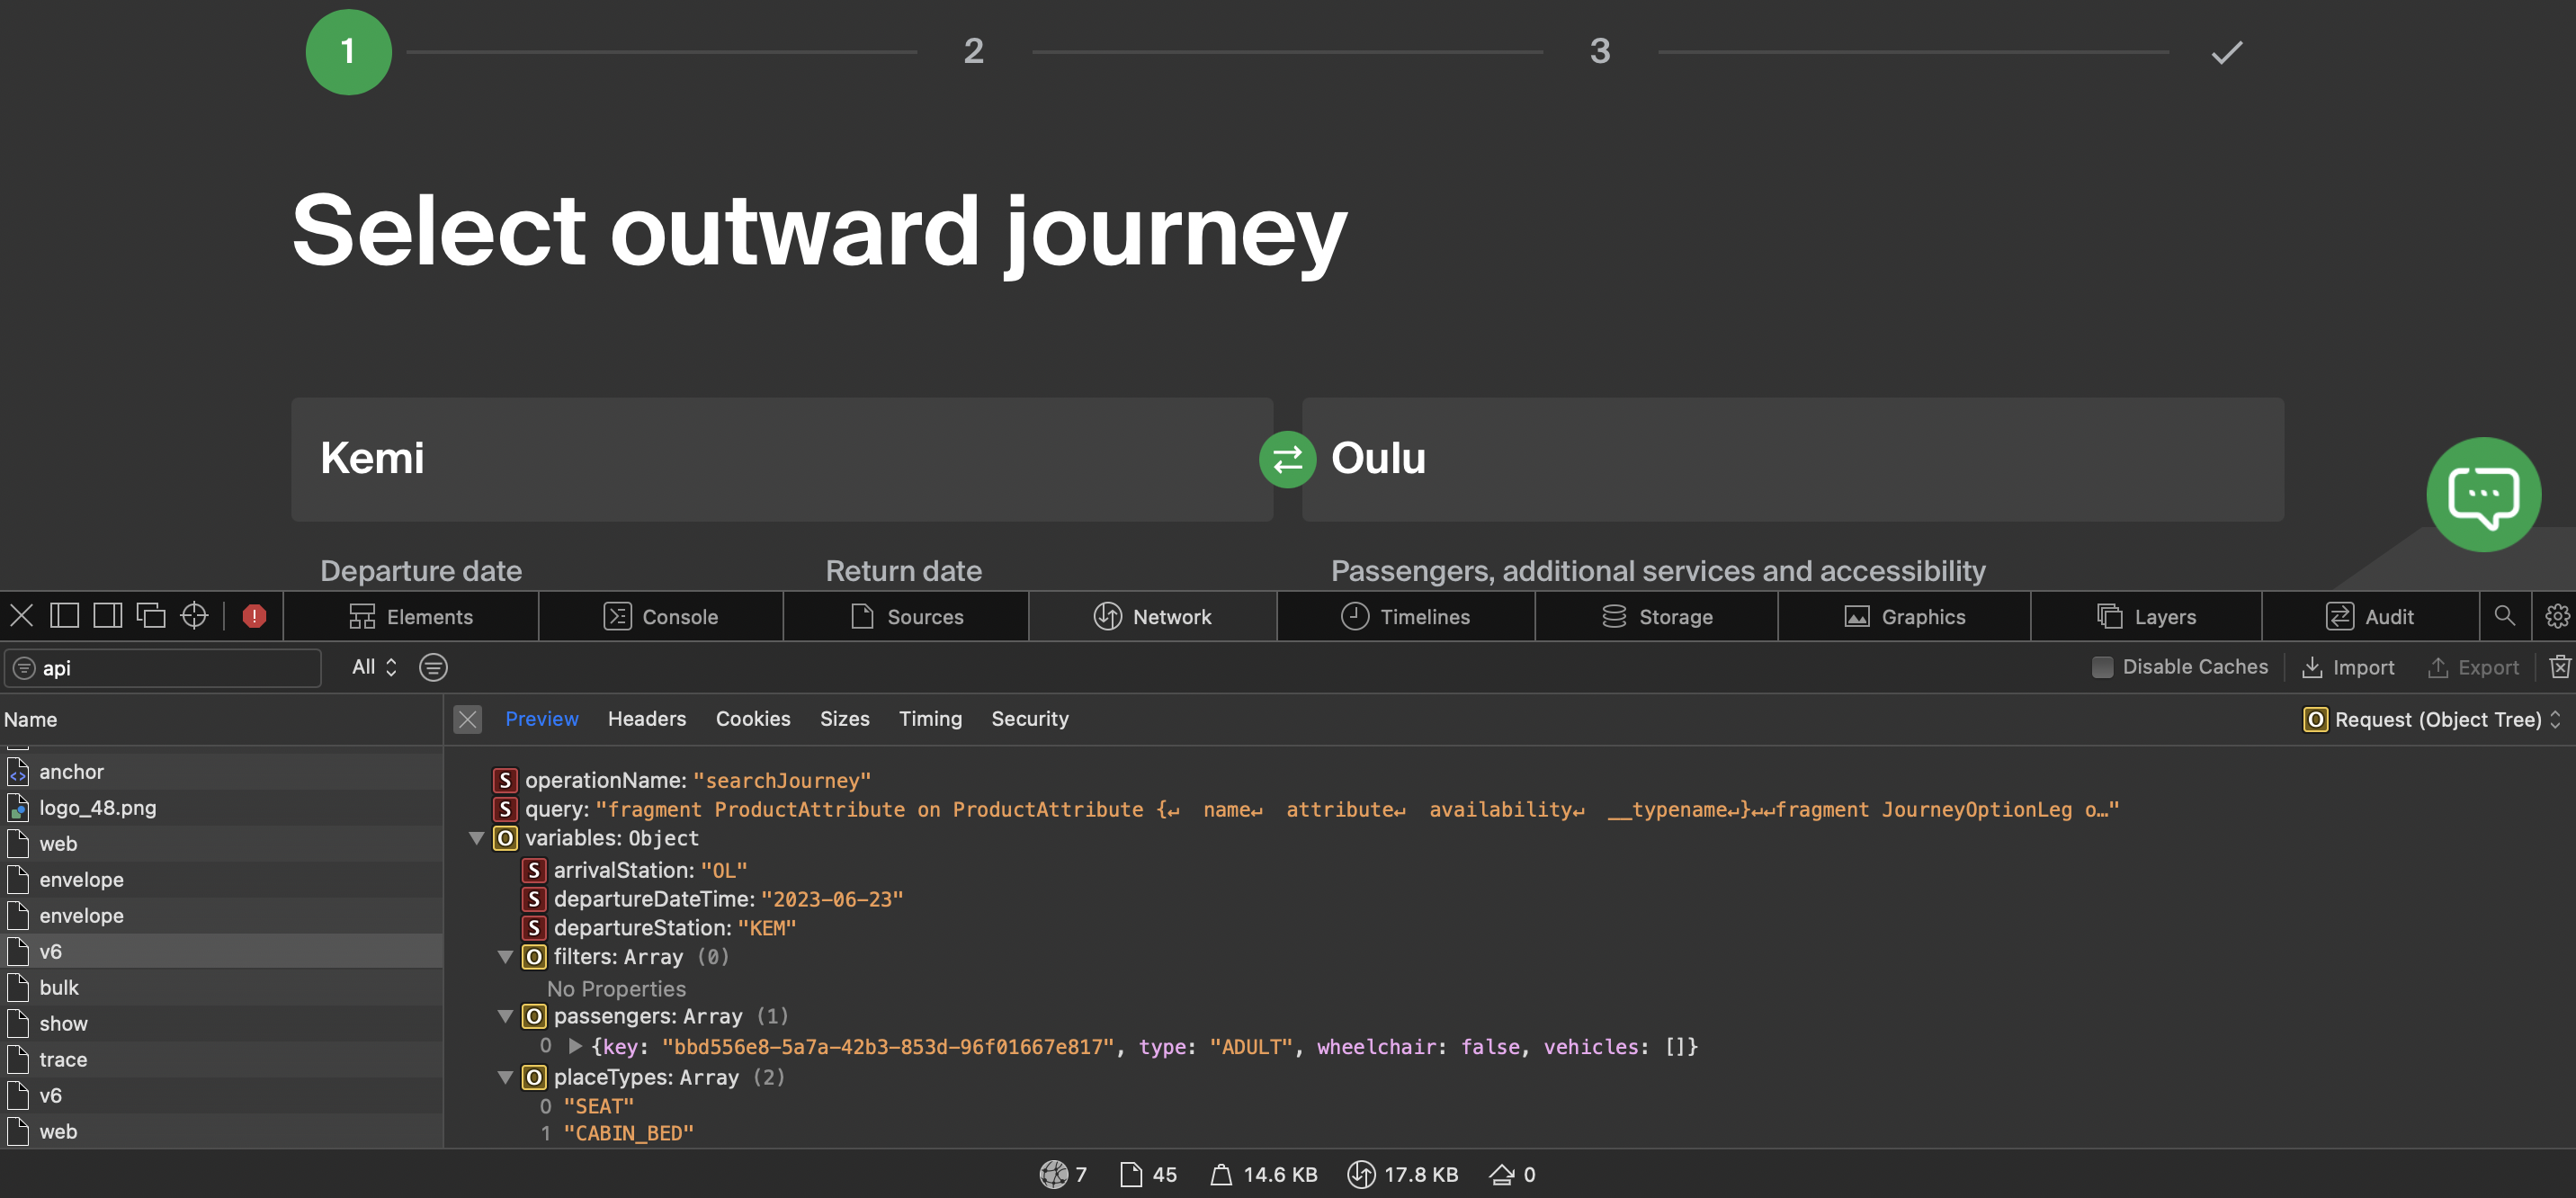
   
    It's a POST request with json payload. It has the important for me parameters: arrivalStation, departureStation and departureDateTime. First two are represented by abbreviations for each destination, like KEM, OL, HSI, JY, TPE.
    I saved this json payload and experimented with it. It turned out I could throw away a few attributes which represent my identifyers (passenger key and something like that).
    In the script I wrote this json string named json_payload.
    
**2. List of destinations.**
    
    The website has selector of destinations and I assumed it must be some map which turns train station names into their abbreviations. After a while I found this mapping scheme in gtm.js script, copypasted it and made the dictionary out of it.
   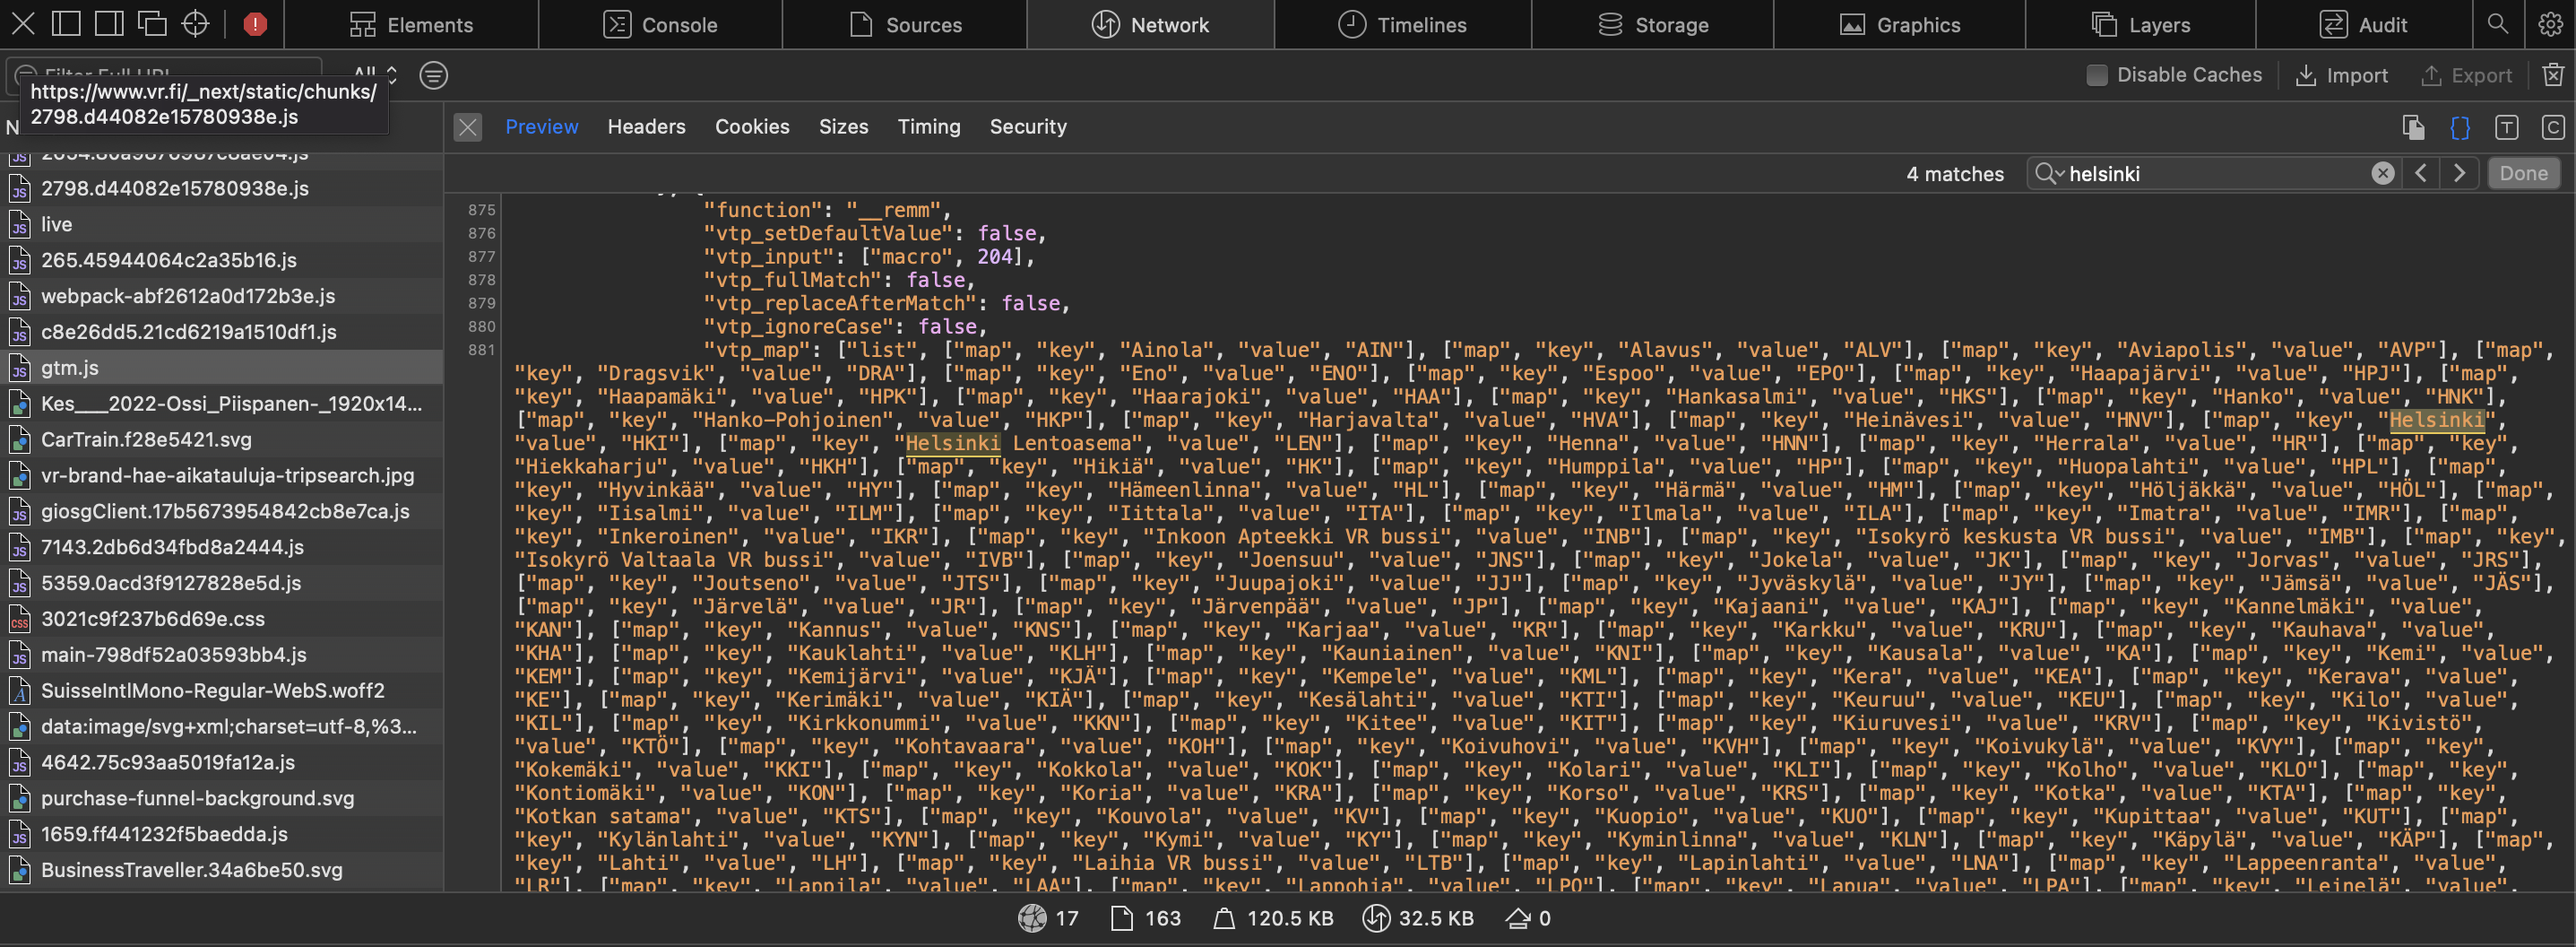
    
**3. Response processing.**

    Response is a json file, which consists of available trains with available seats/services (different types), train id, departure and arrival datetime, destinations and price. In my case I need only price, variable named totalPrice.
    Response time is about 0.3 second
    

In [1]:
# The keymap from gtm.js:

map_stations_list = [["map", "key", "Ainola", "value", "AIN"], ["map", "key", "Alavus", "value", "ALV"], ["map", "key", "Aviapolis", "value", "AVP"], ["map", "key", "Dragsvik", "value", "DRA"], ["map", "key", "Eno", "value", "ENO"], ["map", "key", "Espoo", "value", "EPO"], ["map", "key", "Haapajärvi", "value", "HPJ"], ["map", "key", "Haapamäki", "value", "HPK"], ["map", "key", "Haarajoki", "value", "HAA"], ["map", "key", "Hankasalmi", "value", "HKS"], ["map", "key", "Hanko", "value", "HNK"], ["map", "key", "Hanko-Pohjoinen", "value", "HKP"], ["map", "key", "Harjavalta", "value", "HVA"], ["map", "key", "Heinävesi", "value", "HNV"], ["map", "key", "Helsinki", "value", "HKI"], ["map", "key", "Helsinki Lentoasema", "value", "LEN"], ["map", "key", "Henna", "value", "HNN"], ["map", "key", "Herrala", "value", "HR"], ["map", "key", "Hiekkaharju", "value", "HKH"], ["map", "key", "Hikiä", "value", "HK"], ["map", "key", "Humppila", "value", "HP"], ["map", "key", "Huopalahti", "value", "HPL"], ["map", "key", "Hyvinkää", "value", "HY"], ["map", "key", "Hämeenlinna", "value", "HL"], ["map", "key", "Härmä", "value", "HM"], ["map", "key", "Höljäkkä", "value", "HÖL"], ["map", "key", "Iisalmi", "value", "ILM"], ["map", "key", "Iittala", "value", "ITA"], ["map", "key", "Ilmala", "value", "ILA"], ["map", "key", "Imatra", "value", "IMR"], ["map", "key", "Inkeroinen", "value", "IKR"], ["map", "key", "Inkoon Apteekki VR bussi", "value", "INB"], ["map", "key", "Isokyrö keskusta VR bussi", "value", "IMB"], ["map", "key", "Isokyrö Valtaala VR bussi", "value", "IVB"], ["map", "key", "Joensuu", "value", "JNS"], ["map", "key", "Jokela", "value", "JK"], ["map", "key", "Jorvas", "value", "JRS"], ["map", "key", "Joutseno", "value", "JTS"], ["map", "key", "Juupajoki", "value", "JJ"], ["map", "key", "Jyväskylä", "value", "JY"], ["map", "key", "Jämsä", "value", "JÄS"], ["map", "key", "Järvelä", "value", "JR"], ["map", "key", "Järvenpää", "value", "JP"], ["map", "key", "Kajaani", "value", "KAJ"], ["map", "key", "Kannelmäki", "value", "KAN"], ["map", "key", "Kannus", "value", "KNS"], ["map", "key", "Karjaa", "value", "KR"], ["map", "key", "Karkku", "value", "KRU"], ["map", "key", "Kauhava", "value", "KHA"], ["map", "key", "Kauklahti", "value", "KLH"], ["map", "key", "Kauniainen", "value", "KNI"], ["map", "key", "Kausala", "value", "KA"], ["map", "key", "Kemi", "value", "KEM"], ["map", "key", "Kemijärvi", "value", "KJÄ"], ["map", "key", "Kempele", "value", "KML"], ["map", "key", "Kera", "value", "KEA"], ["map", "key", "Kerava", "value", "KE"], ["map", "key", "Kerimäki", "value", "KIÄ"], ["map", "key", "Kesälahti", "value", "KTI"], ["map", "key", "Keuruu", "value", "KEU"], ["map", "key", "Kilo", "value", "KIL"], ["map", "key", "Kirkkonummi", "value", "KKN"], ["map", "key", "Kitee", "value", "KIT"], ["map", "key", "Kiuruvesi", "value", "KRV"], ["map", "key", "Kivistö", "value", "KTÖ"], ["map", "key", "Kohtavaara", "value", "KOH"], ["map", "key", "Koivuhovi", "value", "KVH"], ["map", "key", "Koivukylä", "value", "KVY"], ["map", "key", "Kokemäki", "value", "KKI"], ["map", "key", "Kokkola", "value", "KOK"], ["map", "key", "Kolari", "value", "KLI"], ["map", "key", "Kolho", "value", "KLO"], ["map", "key", "Kontiomäki", "value", "KON"], ["map", "key", "Koria", "value", "KRA"], ["map", "key", "Korso", "value", "KRS"], ["map", "key", "Kotka", "value", "KTA"], ["map", "key", "Kotkan satama", "value", "KTS"], ["map", "key", "Kouvola", "value", "KV"], ["map", "key", "Kuopio", "value", "KUO"], ["map", "key", "Kupittaa", "value", "KUT"], ["map", "key", "Kylänlahti", "value", "KYN"], ["map", "key", "Kymi", "value", "KY"], ["map", "key", "Kyminlinna", "value", "KLN"], ["map", "key", "Käpylä", "value", "KÄP"], ["map", "key", "Lahti", "value", "LH"], ["map", "key", "Laihia VR bussi", "value", "LTB"], ["map", "key", "Lapinlahti", "value", "LNA"], ["map", "key", "Lappeenranta", "value", "LR"], ["map", "key", "Lappila", "value", "LAA"], ["map", "key", "Lappohja", "value", "LPO"], ["map", "key", "Lapua", "value", "LPA"], ["map", "key", "Leinelä", "value", "LNÄ"], ["map", "key", "Lempäälä", "value", "LPÄ"], ["map", "key", "Leppävaara", "value", "LPV"], ["map", "key", "Lieksa", "value", "LIS"], ["map", "key", "Loimaa", "value", "LM"], ["map", "key", "Louhela", "value", "LOH"], ["map", "key", "Lusto", "value", "LUS"], ["map", "key", "Malmi", "value", "ML"], ["map", "key", "Malminkartano", "value", "MLO"], ["map", "key", "Martinlaakso", "value", "MRL"], ["map", "key", "Masala", "value", "MAS"], ["map", "key", "Mikkeli", "value", "MI"], ["map", "key", "Misi", "value", "MIS"], ["map", "key", "Mommila", "value", "MLA"], ["map", "key", "Moskova (Leningradski)", "value", "MVA"], ["map", "key", "Muhos", "value", "MH"], ["map", "key", "Muurola", "value", "MUL"], ["map", "key", "Myllykoski", "value", "MKI"], ["map", "key", "Myllymäki", "value", "MY"], ["map", "key", "Myyrmäki", "value", "MYR"], ["map", "key", "Mäkkylä", "value", "MÄK"], ["map", "key", "Mäntsälä", "value", "MLÄ"], ["map", "key", "Mäntyharju", "value", "MR"], ["map", "key", "Nastola", "value", "NSL"], ["map", "key", "Nivala", "value", "NVL"], ["map", "key", "Nokia", "value", "NOA"], ["map", "key", "Nurmes", "value", "NRM"], ["map", "key", "Oitti", "value", "OI"], ["map", "key", "Orivesi", "value", "OV"], ["map", "key", "Orivesi keskusta", "value", "OVK"], ["map", "key", "Oulainen", "value", "OU"], ["map", "key", "Oulu", "value", "OL"], ["map", "key", "Oulunkylä", "value", "OLK"], ["map", "key", "Paimenportti", "value", "PTI"], ["map", "key", "Paltamo", "value", "PTO"], ["map", "key", "Parikkala", "value", "PAR"], ["map", "key", "Parkano", "value", "PKO"], ["map", "key", "Parola", "value", "PRL"], ["map", "key", "Pasila", "value", "PSL"], ["map", "key", "Pasila Autojuna-asema", "value", "PAU"], ["map", "key", "Pello", "value", "PEL"], ["map", "key", "Petäjävesi", "value", "PVI"], ["map", "key", "Pieksämäki", "value", "PM"], ["map", "key", "Pietari (Finljandski)", "value", "PTR"], ["map", "key", "Pietari (Ladozhki)", "value", "PTL"], ["map", "key", "Pietarsaari", "value", "PTS"], ["map", "key", "Pihlajavesi", "value", "PH"], ["map", "key", "Pitäjänmäki", "value", "PJM"], ["map", "key", "Pohjois-Haaga", "value", "POH"], ["map", "key", "Pori", "value", "PRI"], ["map", "key", "Puistola", "value", "PLA"], ["map", "key", "Pukinmäki", "value", "PMK"], ["map", "key", "Punkaharju", "value", "PUN"], ["map", "key", "Pyhäsalmi", "value", "PHÄ"], ["map", "key", "Pännäinen", "value", "PNÄ"], ["map", "key", "Pääskylahti", "value", "PKY"], ["map", "key", "Rekola", "value", "RKL"], ["map", "key", "Retretti", "value", "REE"], ["map", "key", "Riihimäki", "value", "RI"], ["map", "key", "Rovaniemi", "value", "ROI"], ["map", "key", "Runni", "value", "RNN"], ["map", "key", "Ruukki", "value", "RKI"], ["map", "key", "Ryttylä", "value", "RY"], ["map", "key", "Salo", "value", "SLO"], ["map", "key", "Santala", "value", "STA"], ["map", "key", "Saunakallio", "value", "SAU"], ["map", "key", "Savio", "value", "SAV"], ["map", "key", "Savonlinna", "value", "SL"], ["map", "key", "Seinäjoki", "value", "SK"], ["map", "key", "Siilinjärvi", "value", "SIJ"], ["map", "key", "Simpele", "value", "SPL"], ["map", "key", "Siuntio", "value", "STI"], ["map", "key", "Skogby", "value", "SGY"], ["map", "key", "Sukeva", "value", "SKV"], ["map", "key", "Suonenjoki", "value", "SNJ"], ["map", "key", "Tammisaari", "value", "TMS"], ["map", "key", "Tampere", "value", "TPE"], ["map", "key", "Tesoma (Tampere)", "value", "TSO"], ["map", "key", "Tapanila", "value", "TNA"], ["map", "key", "Tavastila", "value", "TSL"], ["map", "key", "Tervajoki", "value", "TK"], ["map", "key", "Tervajoki VR bussi", "value", "TPB"], ["map", "key", "Tervola", "value", "TRV"], ["map", "key", "Tikkurila", "value", "TKL"], ["map", "key", "Toijala", "value", "TL"], ["map", "key", "Tolsa", "value", "TOL"], ["map", "key", "Tornio-Itäinen", "value", "TRI"], ["map", "key", "Tuomarila", "value", "TRL"], ["map", "key", "Turenki", "value", "TU"], ["map", "key", "Turku", "value", "TKU"], ["map", "key", "Turku satama", "value", "TUS"], ["map", "key", "Tuuri", "value", "TUU"], ["map", "key", "Tver", "value", "TVE"], ["map", "key", "Uimaharju", "value", "UIM"], ["map", "key", "Utajärvi", "value", "UTJ"], ["map", "key", "Uusikylä", "value", "UKÄ"], ["map", "key", "Vaala", "value", "VAA"], ["map", "key", "Vaasa", "value", "VS"], ["map", "key", "Vainikkala", "value", "VNA"], ["map", "key", "Valimo", "value", "VMO"], ["map", "key", "Vammala", "value", "VMA"], ["map", "key", "Vantaankoski", "value", "VKS"], ["map", "key", "Varkaus", "value", "VAR"], ["map", "key", "Vehkala", "value", "VEH"], ["map", "key", "Vihanti", "value", "VTI"], ["map", "key", "Vihtari", "value", "VIH"], ["map", "key", "Viiala", "value", "VIA"], ["map", "key", "Viinijärvi", "value", "VNJ"], ["map", "key", "Viipuri", "value", "VYB"], ["map", "key", "Villähde", "value", "VLH"], ["map", "key", "Vilppula", "value", "VLP"], ["map", "key", "Vuonislahti", "value", "VSL"], ["map", "key", "Ylistaro VR bussi", "value", "YSB"], ["map", "key", "Ylitornio", "value", "YTR"], ["map", "key", "Ylivieska", "value", "YV"], ["map", "key", "Ähtäri", "value", "ÄHT"], ["map", "key", "Ähtärin Eläinpuisto-Zoo", "value", "EPZ"]]

In [2]:
# Processing of the keymap

directions_dict = {}
for item in map_stations_list:
    directions_dict[item[2].lower()] = item[4]
    
directions_dict

{'ainola': 'AIN',
 'alavus': 'ALV',
 'aviapolis': 'AVP',
 'dragsvik': 'DRA',
 'eno': 'ENO',
 'espoo': 'EPO',
 'haapajärvi': 'HPJ',
 'haapamäki': 'HPK',
 'haarajoki': 'HAA',
 'hankasalmi': 'HKS',
 'hanko': 'HNK',
 'hanko-pohjoinen': 'HKP',
 'harjavalta': 'HVA',
 'heinävesi': 'HNV',
 'helsinki': 'HKI',
 'helsinki lentoasema': 'LEN',
 'henna': 'HNN',
 'herrala': 'HR',
 'hiekkaharju': 'HKH',
 'hikiä': 'HK',
 'humppila': 'HP',
 'huopalahti': 'HPL',
 'hyvinkää': 'HY',
 'hämeenlinna': 'HL',
 'härmä': 'HM',
 'höljäkkä': 'HÖL',
 'iisalmi': 'ILM',
 'iittala': 'ITA',
 'ilmala': 'ILA',
 'imatra': 'IMR',
 'inkeroinen': 'IKR',
 'inkoon apteekki vr bussi': 'INB',
 'isokyrö keskusta vr bussi': 'IMB',
 'isokyrö valtaala vr bussi': 'IVB',
 'joensuu': 'JNS',
 'jokela': 'JK',
 'jorvas': 'JRS',
 'joutseno': 'JTS',
 'juupajoki': 'JJ',
 'jyväskylä': 'JY',
 'jämsä': 'JÄS',
 'järvelä': 'JR',
 'järvenpää': 'JP',
 'kajaani': 'KAJ',
 'kannelmäki': 'KAN',
 'kannus': 'KNS',
 'karjaa': 'KR',
 'karkku': 'KRU',
 'kauh

---
## PROGRAM ITSELF

---

In [3]:
import requests
import json
import datetime
from dateutil.relativedelta import relativedelta


In [4]:
# Hardcoding directions_dict

directions_dict = {'ainola': 'AIN', 'alavus': 'ALV', 'aviapolis': 'AVP', 'dragsvik': 'DRA', 'eno': 'ENO', 'espoo': 'EPO', 'haapajärvi': 'HPJ', 'haapamäki': 'HPK', 'haarajoki': 'HAA', 'hankasalmi': 'HKS', 'hanko': 'HNK', 'hanko-pohjoinen': 'HKP', 'harjavalta': 'HVA', 'heinävesi': 'HNV', 'helsinki': 'HKI', 'helsinki lentoasema': 'LEN', 'henna': 'HNN', 'herrala': 'HR', 'hiekkaharju': 'HKH', 'hikiä': 'HK', 'humppila': 'HP', 'huopalahti': 'HPL', 'hyvinkää': 'HY', 'hämeenlinna': 'HL', 'härmä': 'HM', 'höljäkkä': 'HÖL', 'iisalmi': 'ILM', 'iittala': 'ITA', 'ilmala': 'ILA', 'imatra': 'IMR', 'inkeroinen': 'IKR', 'inkoon apteekki vr bussi': 'INB', 'isokyrö keskusta vr bussi': 'IMB', 'isokyrö valtaala vr bussi': 'IVB', 'joensuu': 'JNS', 'jokela': 'JK', 'jorvas': 'JRS', 'joutseno': 'JTS', 'juupajoki': 'JJ', 'jyväskylä': 'JY', 'jämsä': 'JÄS', 'järvelä': 'JR', 'järvenpää': 'JP', 'kajaani': 'KAJ', 'kannelmäki': 'KAN', 'kannus': 'KNS', 'karjaa': 'KR', 'karkku': 'KRU', 'kauhava': 'KHA', 'kauklahti': 'KLH', 'kauniainen': 'KNI', 'kausala': 'KA', 'kemi': 'KEM', 'kemijärvi': 'KJÄ', 'kempele': 'KML', 'kera': 'KEA', 'kerava': 'KE', 'kerimäki': 'KIÄ', 'kesälahti': 'KTI', 'keuruu': 'KEU', 'kilo': 'KIL', 'kirkkonummi': 'KKN', 'kitee': 'KIT', 'kiuruvesi': 'KRV', 'kivistö': 'KTÖ', 'kohtavaara': 'KOH', 'koivuhovi': 'KVH', 'koivukylä': 'KVY', 'kokemäki': 'KKI', 'kokkola': 'KOK', 'kolari': 'KLI', 'kolho': 'KLO', 'kontiomäki': 'KON', 'koria': 'KRA', 'korso': 'KRS', 'kotka': 'KTA', 'kotkan satama': 'KTS', 'kouvola': 'KV', 'kuopio': 'KUO', 'kupittaa': 'KUT', 'kylänlahti': 'KYN', 'kymi': 'KY', 'kyminlinna': 'KLN', 'käpylä': 'KÄP', 'lahti': 'LH', 'laihia vr bussi': 'LTB', 'lapinlahti': 'LNA', 'lappeenranta': 'LR', 'lappila': 'LAA', 'lappohja': 'LPO', 'lapua': 'LPA', 'leinelä': 'LNÄ', 'lempäälä': 'LPÄ', 'leppävaara': 'LPV', 'lieksa': 'LIS', 'loimaa': 'LM', 'louhela': 'LOH', 'lusto': 'LUS', 'malmi': 'ML', 'malminkartano': 'MLO', 'martinlaakso': 'MRL', 'masala': 'MAS', 'mikkeli': 'MI', 'misi': 'MIS', 'mommila': 'MLA', 'moskova (leningradski)': 'MVA', 'muhos': 'MH', 'muurola': 'MUL', 'myllykoski': 'MKI', 'myllymäki': 'MY', 'myyrmäki': 'MYR', 'mäkkylä': 'MÄK', 'mäntsälä': 'MLÄ', 'mäntyharju': 'MR', 'nastola': 'NSL', 'nivala': 'NVL', 'nokia': 'NOA', 'nurmes': 'NRM', 'oitti': 'OI', 'orivesi': 'OV', 'orivesi keskusta': 'OVK', 'oulainen': 'OU', 'oulu': 'OL', 'oulunkylä': 'OLK', 'paimenportti': 'PTI', 'paltamo': 'PTO', 'parikkala': 'PAR', 'parkano': 'PKO', 'parola': 'PRL', 'pasila': 'PSL', 'pasila autojuna-asema': 'PAU', 'pello': 'PEL', 'petäjävesi': 'PVI', 'pieksämäki': 'PM', 'pietari (finljandski)': 'PTR', 'pietari (ladozhki)': 'PTL', 'pietarsaari': 'PTS', 'pihlajavesi': 'PH', 'pitäjänmäki': 'PJM', 'pohjois-haaga': 'POH', 'pori': 'PRI', 'puistola': 'PLA', 'pukinmäki': 'PMK', 'punkaharju': 'PUN', 'pyhäsalmi': 'PHÄ', 'pännäinen': 'PNÄ', 'pääskylahti': 'PKY', 'rekola': 'RKL', 'retretti': 'REE', 'riihimäki': 'RI', 'rovaniemi': 'ROI', 'runni': 'RNN', 'ruukki': 'RKI', 'ryttylä': 'RY', 'salo': 'SLO', 'santala': 'STA', 'saunakallio': 'SAU', 'savio': 'SAV', 'savonlinna': 'SL', 'seinäjoki': 'SK', 'siilinjärvi': 'SIJ', 'simpele': 'SPL', 'siuntio': 'STI', 'skogby': 'SGY', 'sukeva': 'SKV', 'suonenjoki': 'SNJ', 'tammisaari': 'TMS', 'tampere': 'TPE', 'tesoma (tampere)': 'TSO', 'tapanila': 'TNA', 'tavastila': 'TSL', 'tervajoki': 'TK', 'tervajoki vr bussi': 'TPB', 'tervola': 'TRV', 'tikkurila': 'TKL', 'toijala': 'TL', 'tolsa': 'TOL', 'tornio-itäinen': 'TRI', 'tuomarila': 'TRL', 'turenki': 'TU', 'turku': 'TKU', 'turku satama': 'TUS', 'tuuri': 'TUU', 'tver': 'TVE', 'uimaharju': 'UIM', 'utajärvi': 'UTJ', 'uusikylä': 'UKÄ', 'vaala': 'VAA', 'vaasa': 'VS', 'vainikkala': 'VNA', 'valimo': 'VMO', 'vammala': 'VMA', 'vantaankoski': 'VKS', 'varkaus': 'VAR', 'vehkala': 'VEH', 'vihanti': 'VTI', 'vihtari': 'VIH', 'viiala': 'VIA', 'viinijärvi': 'VNJ', 'viipuri': 'VYB', 'villähde': 'VLH', 'vilppula': 'VLP', 'vuonislahti': 'VSL', 'ylistaro vr bussi': 'YSB', 'ylitornio': 'YTR', 'ylivieska': 'YV', 'ähtäri': 'ÄHT', 'ähtärin eläinpuisto-zoo': 'EPZ'}


In [5]:
class VRSearch:    
    def __init__(self, departure='Kemi', arrival='Oulu',
                date_begin = str(datetime.date.today()),
                date_end = str(datetime.date.today() + relativedelta(months=1)),
                directions_dict = directions_dict):
        
        self.date_begin = datetime.date.fromisoformat(date_begin)
        self.date_end = datetime.date.fromisoformat(date_end)        
        self.directions_dict = directions_dict
        
        # these hardcoding conditions are created to avoid any error, they can be deleted later
        self.departure = departure if departure.lower() in self.directions_dict.keys() else 'Helsinki'
        self.arrival = arrival if arrival.lower() in self.directions_dict.keys() else 'Tampere'
        
        self.result_dict = {}
            
    def __str__(self):
        string = 'Departure : {}\nArrival : {}\nDate search begin : {}\nDate search end : {}\nResult table is {}'.format(
                    self.departure,
                    self.arrival,
                    self.date_begin.strftime('%Y %b %d, %A'),
                    self.date_end.strftime('%Y %b %d, %A'),
                    'full' if self.result_dict else 'empty')
        return string
    
    def request(self, date, return_=False):
        '''
        Parse a single request with the given date. 
        Returns list of the lists, which content:
        [departure time: datetime,
        price: float,
        arrival time: datetime,
        time of journey: time_delta,
        departure station name: str,
        arrival station name: str,
        date and time of today: datetime]
        '''
        
        result=[]
        
        # return_=True condition:
        dep_key = self.departure
        arr_key = self.arrival
        if return_:
            arr_key, dep_key = dep_key, arr_key
        
        # turning direction names into abbreviations
        dep = self.directions_dict[dep_key.lower()]
        arr = self.directions_dict[arr_key.lower()]
            
        # Payload and headers to POST request. Don't touch anything here!   
        json_payload = {
            "operationName": "searchJourney",
            "variables": {
                "filters": [],
                "arrivalStation": arr,
                "departureStation": dep,
                "departureDateTime": date,
                "passengers": [
                    {
                        "key": "",
                        "type": "ADULT",
                        "wheelchair": False,
                        "vehicles": []
                    }
                ],
                "placeTypes": [
                    "SEAT",
                    "CABIN_BED"
                ]
            },
            "query": "fragment ProductAttribute on ProductAttribute {\n  name\n  attribute\n  availability\n  __typename\n}\n\nfragment JourneyOptionLeg on JourneyOptionLeg {\n  id\n  trainNumber\n  trainType\n  type\n  commercialLineIdentifier\n  departureStation\n  arrivalStation\n  productAttributes {\n    ...ProductAttribute\n    __typename\n  }\n  __typename\n}\n\nfragment OptionAvailability on OptionAvailability {\n  seatAvailability\n  accessibleSeatAvailability\n  petSeatAvailability\n  cabinAvailability\n  petCabinAvailability\n  accessibleCabinAvailability\n  __typename\n}\n\nfragment JourneyOptionPassenger on JourneyOptionPassenger {\n  type\n  offers {\n    legId\n    product\n    price\n    discountCategory\n    __typename\n  }\n  __typename\n}\n\nfragment JourneyOption on JourneyOption {\n  id\n  departureTime\n  arrivalTime\n  legs {\n    ...JourneyOptionLeg\n    __typename\n  }\n  totalPrice\n  discount {\n    discountPercentage\n    ids\n    __typename\n  }\n  error\n  passengers {\n    ...JourneyOptionPassenger\n    __typename\n  }\n  availability {\n    ...OptionAvailability\n    __typename\n  }\n  __typename\n}\n\nquery searchJourney($departureStation: String!, $arrivalStation: String!, $departureDateTime: DateTime!, $passengers: [PassengerInput!]!, $filters: [ConnectionFilter]! = [], $placeTypes: [PlaceType!]!, $bundleId: String, $companyId: String) {\n  searchJourney(\n    departureStation: $departureStation\n    arrivalStation: $arrivalStation\n    departureDateTime: $departureDateTime\n    passengers: $passengers\n    filters: $filters\n    placeTypes: $placeTypes\n    bundleId: $bundleId\n    companyId: $companyId\n  ) {\n    ...JourneyOption\n    __typename\n  }\n}"
        }        
        
        headers = {"Content-Type": "application/json; charset=utf-8"}

#         try:
#             response = requests.get('https://reqbin.com/echo', timeout=5)
#             print(response.status_code)
#         except requests.exceptions.Timeout:
#             print('The request timed out')
        
        # POST request
        r = requests.post('https://www.vr.fi/api/v6', json=json_payload, headers=headers)
        
        # Parser
        if r.status_code == 200:
            try:
                for item in r.json()['data']['searchJourney']:
                    dep_time = datetime.datetime.fromisoformat(item['departureTime'])
                    arr_time = datetime.datetime.fromisoformat(item['arrivalTime'])
                    price = (float(item['totalPrice'])/100)
                    result.append([dep_time, price, arr_time, arr_time - dep_time,
                                   dep_key, arr_key, datetime.datetime.today()])
            except KeyError:
                pass 
        
        return result

    def get_prices(self, return_=False):
        '''
        Get prices for everyday until date_end and writing them to result_dict
        if return_=True - dictionary will be augmented with 'return' key
        '''
        
        print('Days processed out of', (self.date_end - datetime.datetime.today().date()).days + 1, ': ')
        
        # condition if begin date is in the past
        if self.date_begin < datetime.date.today():
            date = datetime.date.today()
        else: 
            date = self.date_begin
        
        while date <= self.date_end:
            self.result_dict[date] = {'direct': self.request(str(date))}
            
            if return_:
                self.result_dict[date].update({'return': self.request(str(date), return_=True)})
            
            date = date + relativedelta(days=1)
            print("*", end='')
        
    def show_results(self, time_d_min=0, time_d_max=23, time_r_min=0, time_r_max=23, max_price=500):
        '''
        Show results with filters min and max hour of direct and return, max price
        '''
        
        if self.result_dict:
            dir_symbol = {'direct':'-->', 'return':'<--'}
            dir_hours = {'direct':[time_d_min, time_d_max], 'return':[time_r_min, time_r_max]}
            
            for date_ in self.result_dict:
                print(date_.strftime('%b %d, %A'))
                
                for key in self.result_dict[date_]: # keys are 'direct' and optional 'return'
                    print(dir_symbol[key], end=' ')
                    
                    for item in self.result_dict[date_][key]:                       
                        # item[0] is departure time, item[1] is price
                        if (dir_hours[key][0] <= item[0].hour <= dir_hours[key][1]) & (item[1] < max_price):
                            print('{} - {:>5.2f}€'.format(item[0].strftime('%H:%M'), item[1]), end='|')
                    print('')
                print('')
                
    def save_json(self, filename=''):
        if filename:
            name = str(filename) + '.json'    
        else:
            name = self.departure + ' ' + self.arrival + ' ' + str(datetime.date.today()) + '.json'
        
        # turning every datetime to string and rearranging the dictionary before writing the file
        
        new_dict = {}
        for dates in self.result_dict:
            new_dict[str(dates)] = {}
            
            for directions in self.result_dict[dates]:
                new_dict[str(dates)][directions] = []
                
                for trains in self.result_dict[dates][directions]:
                    new_dict[str(dates)][directions].append(
                            {'Departure': str(trains[0]),
                            'Arrival': str(trains[2]),
                            'Journey': str(trains[3]),
                            'From': trains[4],
                            'To': trains[5],
                            'Price': trains[1],
                            'RequestTime': str(trains[6])},
                         )
        
        with open(name, "w") as outfile:
            json.dump(new_dict, outfile)
        print(name, 'is written') 
    
    def save_csv(self, filename=''):
        '''
        Save results to 'departure arrival yyyy-mm-dd.csv' or custom name
        '''
        
        if filename:
            name = str(filename) + '.csv'    
        else:
            name = self.departure + ' ' + self.arrival + ' ' + str(datetime.date.today()) + '.csv'
            
        with open(name, 'w') as file:
            file.write('dt_request,d_dep,t_dep,d_arr,t_arr,t_travel,place_dep,place_arr,price\n')
            
            for date_ in self.result_dict:
                for key in self.result_dict[date_]:
                    for item in self.result_dict[date_][key]:
                        line = '{},{},{},{},{},{},{},{},{}'.format(
                                    item[6].isoformat(),
                                    str(item[0].date()),
                                    str(item[0].time()),
                                    str(item[2].date()),
                                    str(item[2].time()),
                                    str(item[3]),
                                    item[4],
                                    item[5],
                                    str(item[1]))
                        file.write(line)
                        file.write('\n')
        print(name, 'is written')       
    
    def clear_results(self):
        self.result_dict = {}
    
    def get_dates(self):
        return self.date_begin, self.date_end
    
    def get_destinations(self):
        return self.departure, self.arrival
    
    def set_date_begin(self, date:str):
        self.date_begin = datetime.date.fromisoformat(date)
    
    def set_date_end(self, date:str):
        self.date_end = datetime.date.fromisoformat(date)
        
    def set_departure(self, city:str):
        self.departure = city
    
    def set_arrival(self, city:str):
        self.departure = city


---
## USAGE EXAMPLE

---

In [6]:
# creating the instanse of VRSearch, from Kemi to Tampere until July 25

vr_kemi_tampere = VRSearch(departure='Kemi', arrival='Tampere', date_end='2023-07-25')
print(vr_kemi_tampere)


Departure : Kemi
Arrival : Tampere
Date search begin : 2023 Jun 23, Friday
Date search end : 2023 Jul 25, Tuesday
Result table is empty


In [7]:
# Getting prices with return

vr_kemi_tampere.clear_results()
vr_kemi_tampere.get_prices(return_=True)


Days processed out of 33 : 
*********************************

In [10]:
# Showing thie results with following filters:
# Direct from 6:00 to 12:59, Return from 16:00 to 23:59, Max price is 40

vr_kemi_tampere.show_results(6, 12, 16, 23, 40)


Jun 23, Friday
--> 
<-- 

Jun 24, Saturday
--> 
<-- 23:05 - 30.90€|

Jun 25, Sunday
--> 
<-- 

Jun 26, Monday
--> 
<-- 

Jun 27, Tuesday
--> 
<-- 16:02 - 39.30€|

Jun 28, Wednesday
--> 
<-- 

Jun 29, Thursday
--> 
<-- 

Jun 30, Friday
--> 
<-- 

Jul 01, Saturday
--> 
<-- 

Jul 02, Sunday
--> 
<-- 

Jul 03, Monday
--> 
<-- 

Jul 04, Tuesday
--> 
<-- 

Jul 05, Wednesday
--> 10:15 - 39.90€|
<-- 

Jul 06, Thursday
--> 
<-- 

Jul 07, Friday
--> 
<-- 

Jul 08, Saturday
--> 
<-- 

Jul 09, Sunday
--> 
<-- 23:05 - 39.30€|

Jul 10, Monday
--> 
<-- 23:59 - 36.50€|

Jul 11, Tuesday
--> 10:40 - 39.30€|
<-- 16:02 - 37.80€|23:05 - 25.30€|

Jul 12, Wednesday
--> 06:39 - 36.50€|10:40 - 36.50€|
<-- 16:02 - 39.80€|23:05 - 36.50€|23:59 - 39.30€|

Jul 13, Thursday
--> 
<-- 23:05 - 30.90€|23:59 - 36.50€|

Jul 14, Friday
--> 06:39 - 33.70€|
<-- 23:05 - 30.90€|

Jul 15, Saturday
--> 10:40 - 39.30€|
<-- 23:05 - 36.50€|23:59 - 36.50€|

Jul 16, Sunday
--> 
<-- 23:05 - 30.90€|

Jul 17, Monday
--> 
<-- 23:05 - 36.

In [13]:
# Saving to csv:

vr_kemi_tampere.save_csv()


Kemi Tampere 2023-06-23.csv is written


In [14]:
# Take a look on it:

import pandas as pd

with open('Kemi Tampere 2023-06-23.csv', 'r') as file:
    df = pd.read_csv(file)

df

,dt_request,d_dep,t_dep,d_arr,t_arr,t_travel,place_dep,place_arr,price
0,2023-06-23T23:42:50.102964,2023-06-24,02:30:00,2023-06-24,09:32:00,7:02:00,Tampere,Kemi,36.5
1,2023-06-23T23:42:50.749792,2023-06-24,10:40:00,2023-06-24,17:45:00,7:05:00,Kemi,Tampere,49.9
2,2023-06-23T23:42:50.749821,2023-06-24,14:32:00,2023-06-24,20:51:00,6:19:00,Kemi,Tampere,48.6
3,2023-06-23T23:42:50.749827,2023-06-24,16:59:00,2023-06-24,21:51:00,4:52:00,Kemi,Tampere,48.6
4,2023-06-23T23:42:50.749834,2023-06-24,19:24:00,2023-06-25,02:59:00,7:35:00,Kemi,Tampere,36.5
...,...,...,...,...,...,...,...,...,...
474,2023-06-23T23:43:32.831690,2023-07-25,14:02:00,2023-07-25,19:03:00,5:01:00,Tampere,Kemi,32.2
475,2023-06-23T23:43:32.831699,2023-07-25,15:02:00,2023-07-25,21:22:00,6:20:00,Tampere,Kemi,25.3
476,2023-06-23T23:43:32.831708,2023-07-25,16:02:00,2023-07-25,21:22:00,5:20:00,Tampere,Kemi,27.6
477,2023-06-23T23:43:32.831716,2023-07-25,23:05:00,2023-07-26,05:58:00,6:53:00,Tampere,Kemi,33.7


In [11]:
# Saving to json:

vr_kemi_tampere.save_json()

Kemi Tampere 2023-06-23.json is written


In [34]:
# Let's take a look on it:

with open('Kemi Tampere 2023-06-23.json', 'r') as file:
    data_json = json.load(file)

# to reduce the output I show only 2 days
for i in range(1, 3):
    for destination in data_json[list(data_json.keys())[i]]:
        for train in data_json[list(data_json.keys())[i]][destination]:
            print(list(data_json.keys())[i], destination, train)

2023-06-24 direct {'Departure': '2023-06-24 10:40:00+03:00', 'Arrival': '2023-06-24 17:45:00+03:00', 'Journey': '7:05:00', 'From': 'Kemi', 'To': 'Tampere', 'Price': 49.9, 'RequestTime': '2023-06-23 23:42:50.749792'}
2023-06-24 direct {'Departure': '2023-06-24 14:32:00+03:00', 'Arrival': '2023-06-24 20:51:00+03:00', 'Journey': '6:19:00', 'From': 'Kemi', 'To': 'Tampere', 'Price': 48.6, 'RequestTime': '2023-06-23 23:42:50.749821'}
2023-06-24 direct {'Departure': '2023-06-24 16:59:00+03:00', 'Arrival': '2023-06-24 21:51:00+03:00', 'Journey': '4:52:00', 'From': 'Kemi', 'To': 'Tampere', 'Price': 48.6, 'RequestTime': '2023-06-23 23:42:50.749827'}
2023-06-24 direct {'Departure': '2023-06-24 19:24:00+03:00', 'Arrival': '2023-06-25 02:59:00+03:00', 'Journey': '7:35:00', 'From': 'Kemi', 'To': 'Tampere', 'Price': 36.5, 'RequestTime': '2023-06-23 23:42:50.749834'}
2023-06-24 direct {'Departure': '2023-06-24 22:28:00+03:00', 'Arrival': '2023-06-25 05:35:00+03:00', 'Journey': '7:07:00', 'From': 'Kemi

___
If you want - try this out on some open platform which supports Python
---